# Data Cleaning Notebook
## Objectives
Assess and handle missing values
Clean data

## Inputs
outputs/datasets/collection/HousePrices.csv

## Outputs
Cleaned data in outputs/datasets/cleaned
Data cleaning pipline

---

# Change working directory
We need to change the working directory from its current folder to its parent folder

In [1]:
import os

current_path = os.getcwd()
os.chdir(os.path.dirname(current_path))
current_path = os.getcwd()
current_path

'/workspace/CI_PP5'

# Data Exploration
Let's look at the data we gathered.

In [2]:
import pandas as pd
df = pd.read_csv(f"outputs/datasets/collection/HousePrices.csv")
df.head()


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


## Profile Report

In [3]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Looking at the profile generated, we see a couple of issues:
- Some variables are missing data
- Some variables have non-numerical values.

# Handling non-numerical values
We'll start with the non-numerical variables.
These needs to be converted into a more manageable value.

In [4]:
non_numerical = df.select_dtypes(include=['object']).columns
for col in non_numerical:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Unique values in 'BsmtExposure':
['No' 'Gd' 'Mn' 'Av' 'None']

Unique values in 'BsmtFinType1':
['GLQ' 'ALQ' 'Unf' 'Rec' nan 'BLQ' 'None' 'LwQ']

Unique values in 'GarageFinish':
['RFn' 'Unf' nan 'Fin' 'None']

Unique values in 'KitchenQual':
['Gd' 'TA' 'Ex' 'Fa']


So, the following variables have non-numerical values:
- BsmtExposure
- BsmtFinType1
- GarageFinish
- KitchenQual

Let's convert these to a manageable integer using the following mapping:

In [5]:
# Mapping dictionaries for each feature
BsmtExposure_map = {'None': 0,'No': 0, 'Mn': 1, 'Av': 2, 'Gd': 3}
BsmtFinType1_map = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0}
GarageFinish_map = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0}
KitchenQual_map = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0}

# Applying the mappings to the dataframe
df['BsmtExposure'] = df['BsmtExposure'].map(BsmtExposure_map)
df['BsmtFinType1'] = df['BsmtFinType1'].map(BsmtFinType1_map)
df['GarageFinish'] = df['GarageFinish'].map(GarageFinish_map)
df['KitchenQual'] = df['KitchenQual'].map(KitchenQual_map)

# Handling Missing Data
To handle the missing data, we need to investigate further.

In [6]:
summary = pd.DataFrame({
    "Name": df.columns,
    "DataType": df.dtypes,
    "TotalValues": len(df),
    "MissingValues": df.isnull().sum(),
    "PercentageMissing": df.isnull().sum() * 100 / len(df)
})

summary.reset_index(drop=True, inplace=True)


sorted_summary = summary.sort_values(by='PercentageMissing', ascending=False)
sorted_summary

,Name,DataType,TotalValues,MissingValues,PercentageMissing
7,EnclosedPorch,float64,1460,1324,90.684932
20,WoodDeckSF,float64,1460,1305,89.383562
14,LotFrontage,float64,1460,259,17.739726
9,GarageFinish,float64,1460,162,11.095890
5,BsmtFinType1,float64,1460,114,7.808219
2,BedroomAbvGr,float64,1460,99,6.780822
1,2ndFlrSF,float64,1460,86,5.890411
10,GarageYrBlt,float64,1460,81,5.547945
15,MasVnrArea,float64,1460,8,0.547945
0,1stFlrSF,int64,1460,0,0.000000


## Drop High-missing columns
Since both **EnclosedPorch** and **WoodDeckSF** have above 85% missing values, we will drop these.

In [7]:
df.drop(['EnclosedPorch', 'WoodDeckSF'], axis=1, inplace=True)

## Plotting the missing data

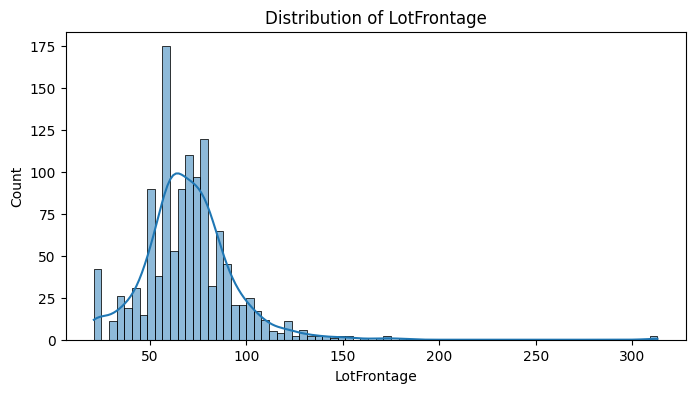

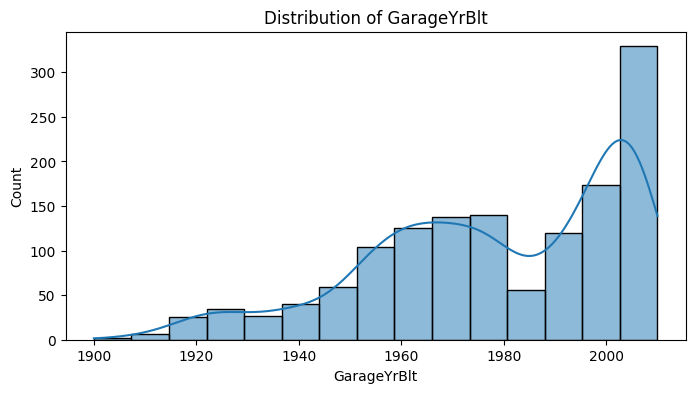

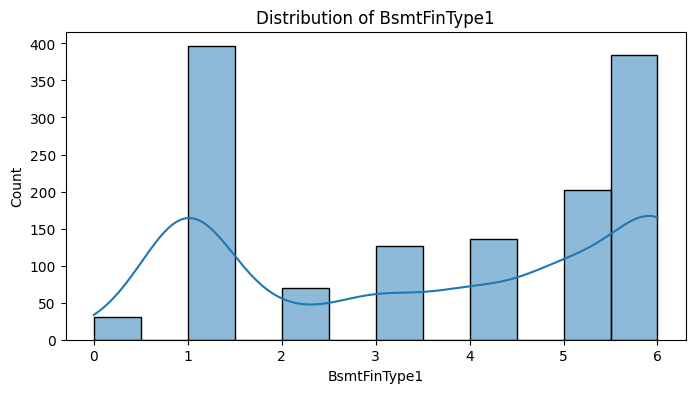

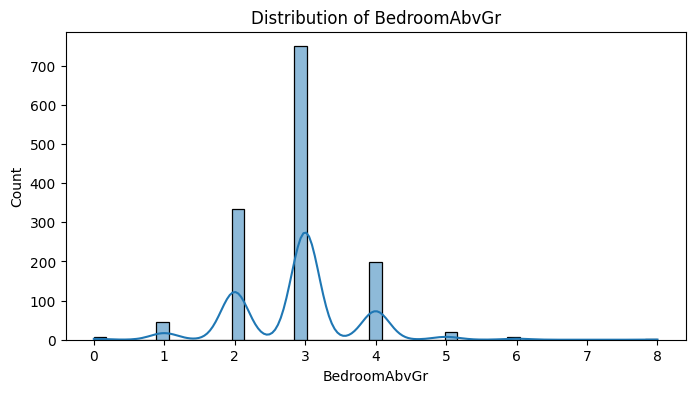

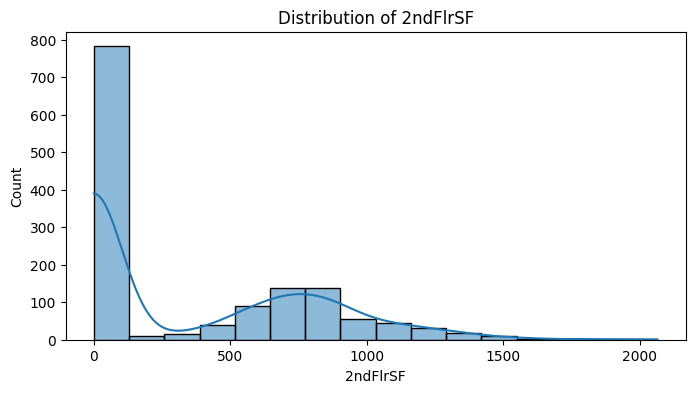

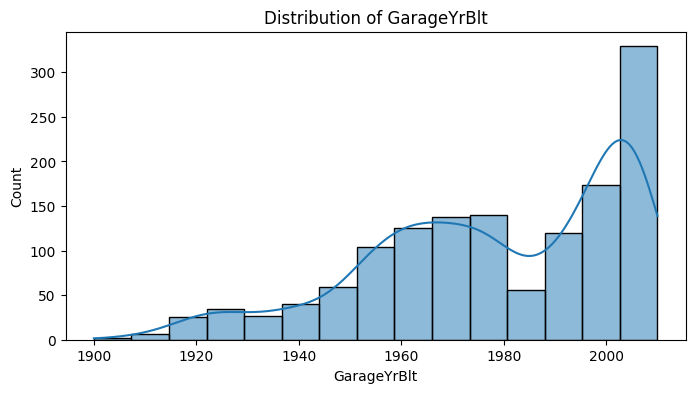

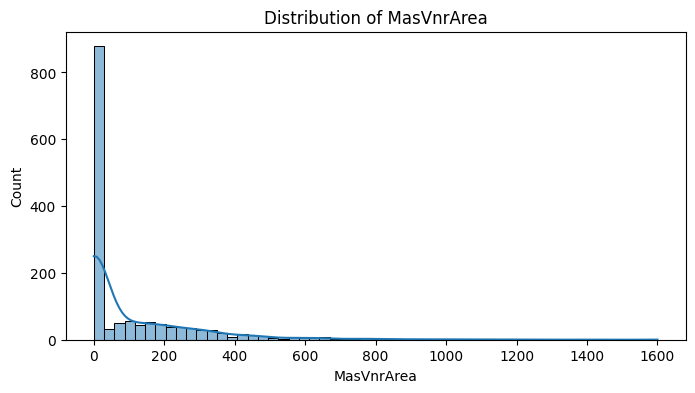

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_check = ['LotFrontage', 'GarageYrBlt', 'BsmtFinType1', 'BedroomAbvGr', '2ndFlrSF', 'GarageYrBlt', 'MasVnrArea']

for col in columns_to_check:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [9]:
skewness = df[columns_to_check].skew()
skewness

LotFrontage     2.163569
GarageYrBlt    -0.649415
BsmtFinType1   -0.155891
BedroomAbvGr    0.229541
2ndFlrSF        0.815123
GarageYrBlt    -0.649415
MasVnrArea      2.669084
dtype: float64

## Replacing missing values
The missing values of both **GarageFinish** and **BsmtFinType1** implies that the house doesn't have either a Garage or a basement.
So we will be replacing these values with zeroes.

In [10]:
for col in ['GarageFinish', 'BsmtFinType1']:
    df[col] = df[col].fillna(0)

## Mean Imputation
**BedroomAbvGr** are approximately symmetric, so we'll use mean imputation to fill the missing values.

In [11]:
df['BedroomAbvGr'].fillna(df['BedroomAbvGr'].mean(), inplace=True)

## Median Imputation
The rest of the variables are either moderately or highly skewed. Therefore we'll use median imputation on these.

In [12]:
for col in ['LotFrontage', '2ndFlrSF', 'MasVnrArea', 'GarageYrBlt']:
    df[col].fillna(df[col].median(), inplace=True)

### Double check
Now we'll doublecheck that there are no more missing values

In [13]:
df.isnull().sum()

1stFlrSF        0
2ndFlrSF        0
BedroomAbvGr    0
BsmtExposure    0
BsmtFinSF1      0
BsmtFinType1    0
BsmtUnfSF       0
GarageArea      0
GarageFinish    0
GarageYrBlt     0
GrLivArea       0
KitchenQual     0
LotArea         0
LotFrontage     0
MasVnrArea      0
OpenPorchSF     0
OverallCond     0
OverallQual     0
TotalBsmtSF     0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64

# Split Train and Test Set

In [14]:
try:
    os.makedirs(name='outputs/datasets/cleaned')
except Exception as e:
    print(e)

[Errno 17] File exists: 'outputs/datasets/cleaned'


In [15]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        df,
                                        df['SalePrice'],
                                        test_size=0.2,
                                        random_state=0)

## Train Set

In [16]:
TrainSet.to_csv("outputs/datasets/cleaned/TrainSetCleaned.csv", index=False)

## Test Set

In [17]:
TestSet.to_csv("outputs/datasets/cleaned/TestSetCleaned.csv", index=False)

## Cleaned Set

In [18]:
df.to_csv("outputs/datasets/cleaned/HousePricesCleaned.csv", index=False)